In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Carregar dataset
data = load_wine()
X = data.data
y = data.target
classes = data.target_names
print(f"Classes: {classes}")

Classes: ['class_0' 'class_1' 'class_2']


In [3]:
# 2. Pré-processamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_categorical = to_categorical(y, num_classes=3)

In [4]:
# 3. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42
)

In [7]:
# 4. Modelo Keras
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# 5. Treinamento
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=8,
    verbose=0
)

In [9]:
# 6. Avaliação
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia da Rede Neural: {acc:.4f}")

Acurácia da Rede Neural: 1.0000


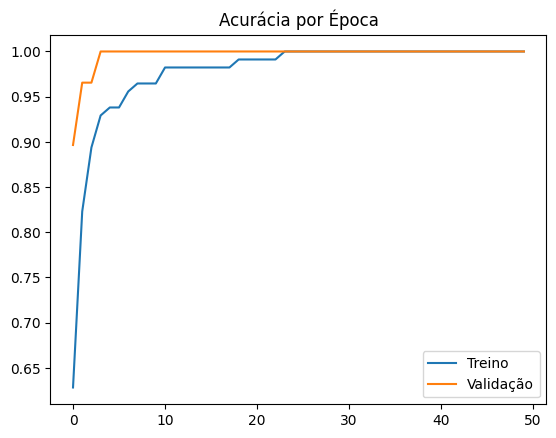

In [10]:
# Curvas de treino
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.legend(); plt.show()

In [11]:
# 7. Comparação com RandomForest
y_train_rf = np.argmax(y_train, axis=1)
y_test_rf = np.argmax(y_test, axis=1)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_rf)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Acurácia RandomForest: {acc_rf:.4f}")
print("\nRelatório RandomForest:\n", classification_report(y_test_rf, y_pred_rf))

Acurácia RandomForest: 1.0000

Relatório RandomForest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

